# Plot mean flowfields

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

import postproamrwindsample_xarray as ppsamplexr
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def loadpickle(picklefile):
    pfile          = open(picklefile, 'rb')
    ds             = pickle.load(pfile)
    pfile.close()
    return ds

## Turbine hub-height

In [3]:
hhds = loadpickle('means/turbhh_avg.pkl')

(730.0, 4540.0, 2052.0, 3068.0)

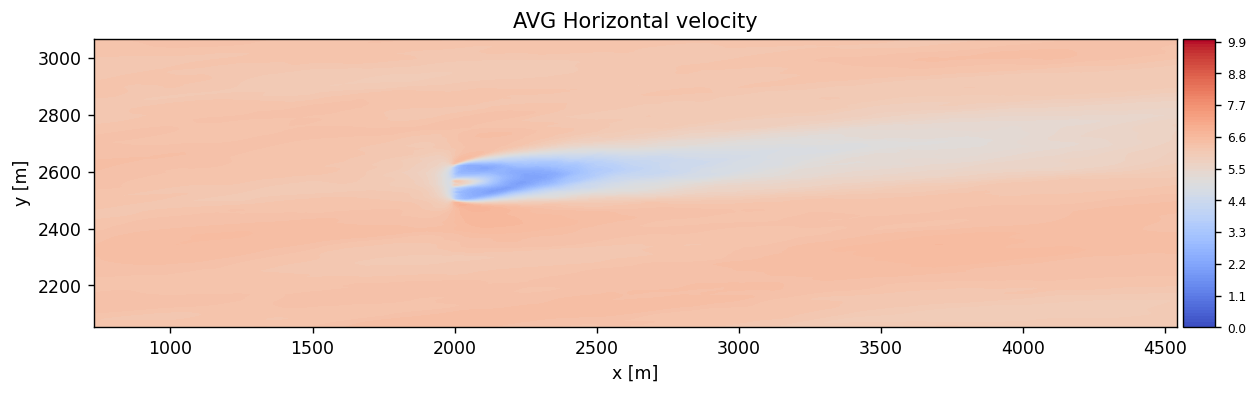

In [4]:
# Plot the turbine hub-height slice
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
clevels=np.linspace(0, 10,101)
iplane= 0

Uh=np.sqrt(hhds['velocityx_avg'][iplane,:,:]**2+hhds['velocityy_avg'][iplane,:,:]**2)
c=plt.contourf(hhds['x'][iplane,:,:], hhds['y'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('AVG Horizontal velocity')
ax.axis('scaled')

(730.0, 4540.0, 2052.0, 3068.0)

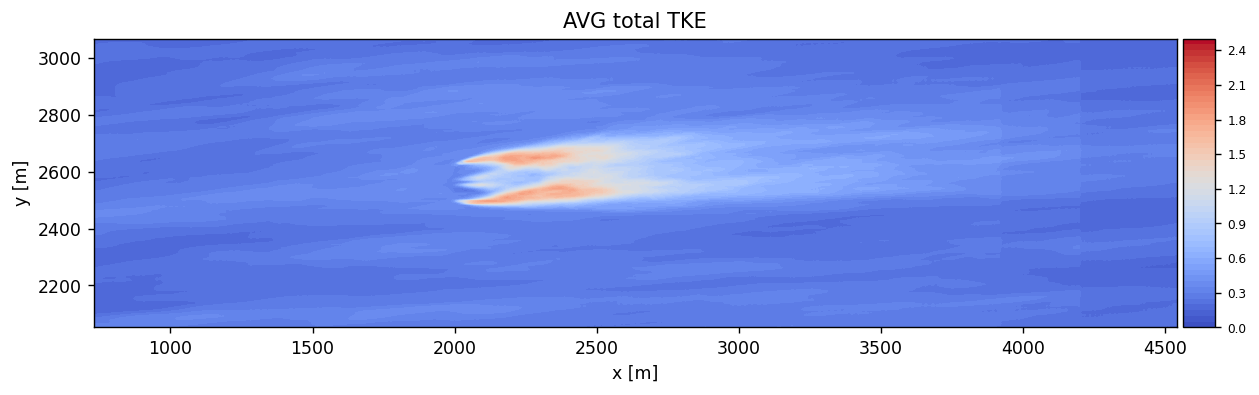

In [5]:
# Plot the turbine hub-height slice
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
klevels=np.linspace(0, 2.5,51)
iplane= 0
TKEtot = 0.5*(hhds['uu_avg'][iplane,:,:] + hhds['vv_avg'][iplane,:,:] + hhds['ww_avg'][iplane,:,:]) + hhds['tke_avg'][iplane,:,:]
c=plt.contourf(hhds['x'][iplane,:,:], hhds['y'][iplane,:,:], TKEtot, levels=klevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('AVG total TKE')
ax.axis('scaled')

## Turbine rotor plane

In [6]:
RPdb = loadpickle('means/rotor_avg.pkl')

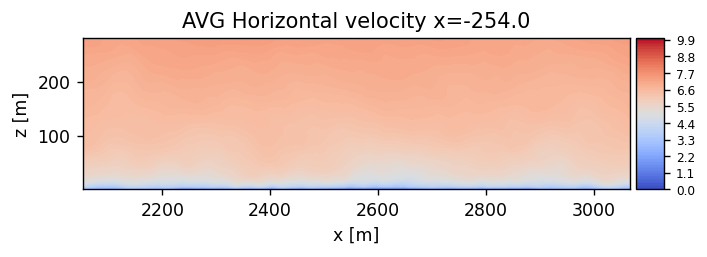

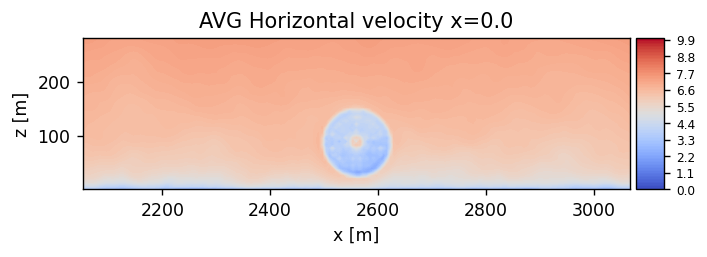

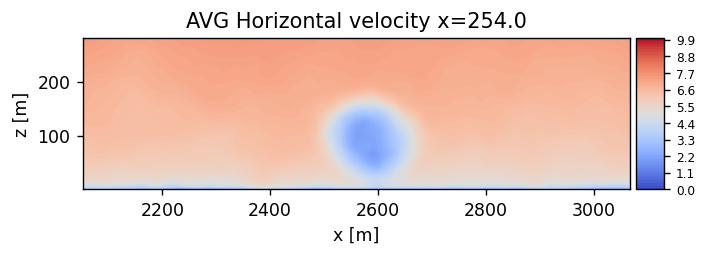

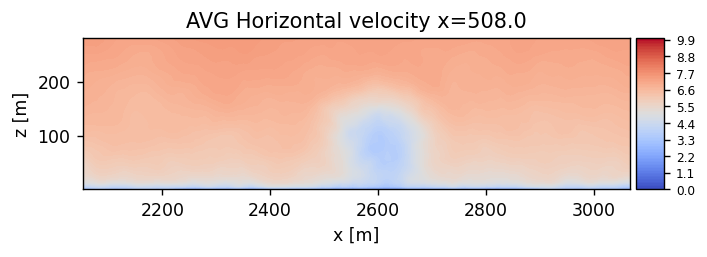

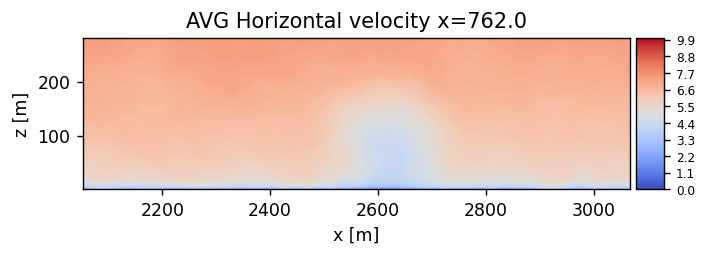

In [7]:
plotplanes = [4, 5, 6, 7,8]
for iplane in plotplanes:
    fig, ax = plt.subplots(1,1,figsize=(6,3), dpi=125)
    clevels=np.linspace(0, 10,101)
    iter  = 1000
    Uh=np.sqrt(RPdb['velocityx_avg'][iplane,:,:]**2+RPdb['velocityy_avg'][iplane,:,:]**2)
    c=plt.contourf(RPdb['y'][iplane,:,:], RPdb['z'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=7)

    #plt.colorbar()
    ax.axis('scaled')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('z [m]')
    ax.set_title('AVG Horizontal velocity x=%0.1f'%(np.mean(RPdb['x'][iplane,:,:])-2000))

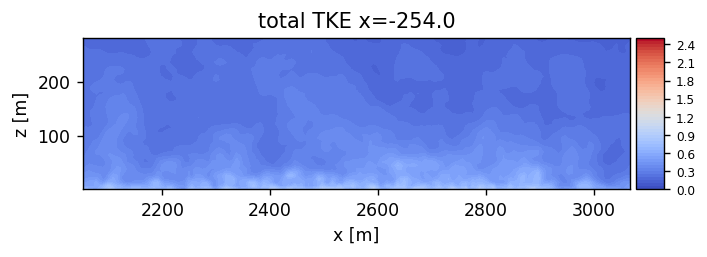

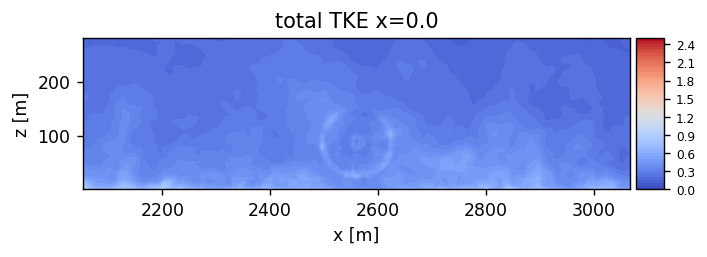

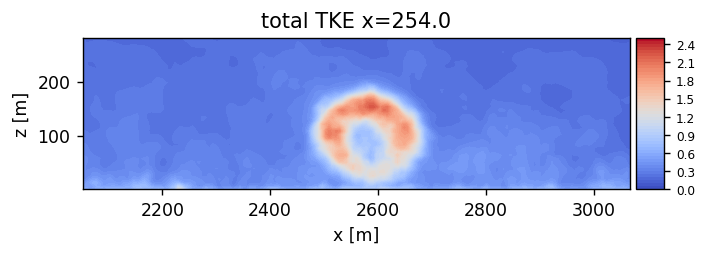

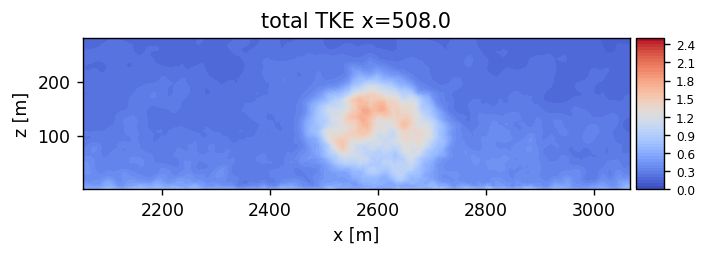

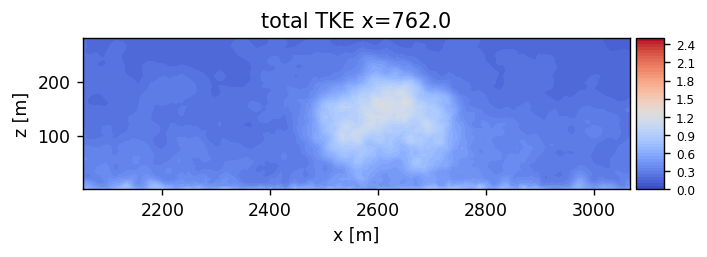

In [8]:
plotplanes = [4, 5, 6, 7,8]
for iplane in plotplanes:
    fig, ax = plt.subplots(1,1,figsize=(6,3), dpi=125)
    klevels=np.linspace(0, 2.5,51)
    TKEtot = 0.5*(RPdb['uu_avg'][iplane,:,:] + RPdb['vv_avg'][iplane,:,:] + RPdb['ww_avg'][iplane,:,:]) + RPdb['tke_avg'][iplane,:,:]
    c=plt.contourf(RPdb['y'][iplane,:,:], RPdb['z'][iplane,:,:], TKEtot, levels=klevels, cmap='coolwarm')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=7)

    #plt.colorbar()
    ax.axis('scaled')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('z [m]')
    ax.set_title('total TKE x=%0.1f'%(np.mean(RPdb['x'][iplane,:,:])-2000))

## Turbine streamwise

In [9]:
SWdb = loadpickle('means/wakesw_avg.pkl')

(735.8468280736829, 4528.306343852634, 0.08400000000000318, 280.5)

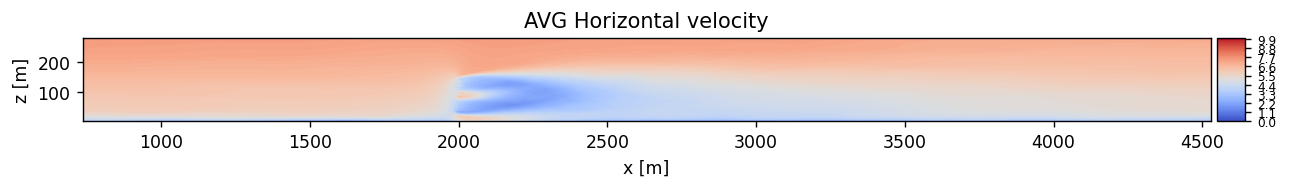

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
clevels=np.linspace(0, 10,101)
iplane= 0
iter  = 1000
Uh=np.sqrt(SWdb['velocityx_avg'][iplane,:,:]**2+SWdb['velocityy_avg'][iplane,:,:]**2)
c=plt.contourf(SWdb['x'][iplane,:,:], SWdb['z'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')
ax.set_title('AVG Horizontal velocity')
ax.axis('scaled')

(735.8468280736829, 4528.306343852634, 0.08400000000000318, 280.5)

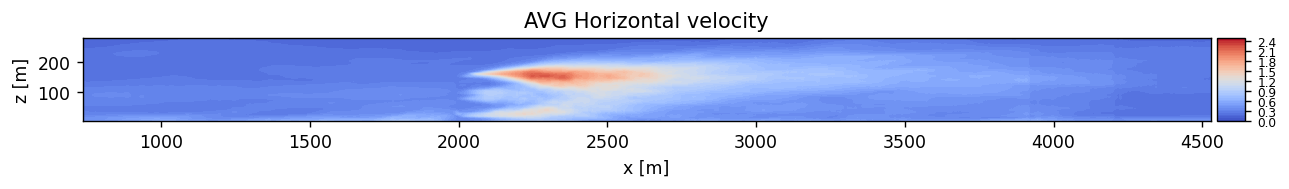

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
#clevels=np.linspace(0, 10,101)
klevels=np.linspace(0, 2.5,51)
iplane= 0
TKEtot = 0.5*(SWdb['uu_avg'][iplane,:,:] + SWdb['vv_avg'][iplane,:,:] + SWdb['ww_avg'][iplane,:,:]) + SWdb['tke_avg'][iplane,:,:]
c=plt.contourf(SWdb['x'][iplane,:,:], SWdb['z'][iplane,:,:], TKEtot, levels=klevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')
ax.set_title('AVG Horizontal velocity')
ax.axis('scaled')